# MLPY: Getting Started

Este notebook te introducirá a los conceptos básicos de MLPY, un framework moderno de machine learning para Python.

## 1. Instalación y Setup

Primero, asegúrate de tener MLPY instalado:

In [ ]:
# Si no está instalado, descomenta la siguiente línea:
# !pip install mlpy

import mlpy
print(f"MLPY version: {mlpy.__version__}")

## 2. Conceptos Básicos

MLPY está construido alrededor de varios conceptos clave:

- **Task**: Encapsula los datos y metadatos de un problema de ML
- **Learner**: Interfaz unificada para algoritmos de ML
- **Measure**: Métricas para evaluar el rendimiento
- **Resampling**: Estrategias para evaluación robusta

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Importar componentes principales de MLPY
from mlpy.tasks import TaskClassif
from mlpy.learners import LearnerClassifFeatureless
from mlpy.measures import MeasureClassifAccuracy, MeasureClassifF1
from mlpy.resamplings import ResamplingCV
from mlpy import resample

C:\Users\gran_\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\gran_\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## 3. Crear una Tarea (Task)

Vamos a trabajar con el dataset Iris:

In [2]:
# Cargar datos
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print(f"Dataset shape: {df.shape}")
print(f"\nPrimeras filas:")
df.head()

Dataset shape: (150, 5)

Primeras filas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Crear una tarea de clasificación
task = TaskClassif(
      data=df,
      target='species',
      id='iris_classification'
)

# Explorar la tarea
print(f"Tipo de tarea: {task.task_type}")
print(f"Número de features: {len(task.feature_names)}")
print(f"Número de observaciones: {task.nrow}")
print(f"Clases: {task.class_names}")
print(f"Número de clases: {task.n_classes}")
print(f"\nFeatures disponibles:")
print(task.feature_names)

Tipo de tarea: classif
Número de features: 4
Número de observaciones: 150
Clases: ['setosa', 'versicolor', 'virginica']
Número de clases: 3

Features disponibles:
['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']


## 4. Crear un Learner

Comenzaremos con un learner baseline simple:

In [4]:
# Learner baseline que predice la clase más frecuente
baseline_learner = LearnerClassifFeatureless(
    id='baseline_mode',
    method='mode'
)

print(f"Learner ID: {baseline_learner.id}")
print(f"Tipo de predicción: {baseline_learner.predict_type}")
print(f"¿Está entrenado?: {baseline_learner.is_trained}")

Learner ID: baseline_mode
Tipo de predicción: response
¿Está entrenado?: False


## 5. Entrenar y Predecir

Veamos cómo entrenar el modelo y hacer predicciones:

In [5]:
# Entrenar el learner
baseline_learner.train(task)
print(f"¿Está entrenado ahora?: {baseline_learner.is_trained}")

# Hacer predicciones
predictions = baseline_learner.predict(task)

# Ver algunas predicciones
print("\nPrimeras 10 predicciones:")
print(predictions.response[:10])
print("\nClases reales:")
print(predictions.truth[:10])

¿Está entrenado ahora?: True

Primeras 10 predicciones:
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']

Clases reales:
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']


## 6. Evaluar el Rendimiento

Usemos medidas para evaluar las predicciones:

In [6]:
# Crear medidas
accuracy = MeasureClassifAccuracy()
f1 = MeasureClassifF1(average='macro')

# Calcular scores
acc_score = accuracy.score(predictions)
f1_score = f1.score(predictions)

print(f"Accuracy: {acc_score:.3f}")
print(f"F1-Score (macro): {f1_score:.3f}")

# Como es baseline, esperamos baja performance

Accuracy: 0.333
F1-Score (macro): 0.167


## 7. Cross-Validation

Para una evaluación más robusta, usemos cross-validation:

In [8]:
# Definir estrategia de resampling
cv = ResamplingCV(
    folds=5,
    stratify=True  # Mantener proporción de clases
)

# Ejecutar evaluación con cross-validation
result = resample(
    task=task,
    learner=baseline_learner,
    resampling=cv,
    measures=[accuracy, f1]
)

print(f"Número de iteraciones: {result.n_iters}")
print(f"Número de errores: {result.n_errors}")
print(f"¿Hubo errores?: {result.n_errors > 0}")

# Ver resultados agregados
print("\nResultados agregados:")
print(result.aggregate())

# Obtener score promedio para accuracy
print(f"\nAccuracy promedio: {result.score('classif.acc', 'mean'):.4f}")
print(f"F1 promedio: {result.score('classif.f1', 'mean'):.4f}")

2025-08-09 22:16:47 - mlpy.resample - INFO - Starting resampling: baseline_mode on iris_classification using cv (5 iterations)
2025-08-09 22:16:47 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors
Número de iteraciones: 5
Número de errores: 0
¿Hubo errores?: False

Resultados agregados:
       measure      mean  std       min       max    median
0  classif.acc  0.333333  0.0  0.333333  0.333333  0.333333
1   classif.f1  0.166667  0.0  0.166667  0.166667  0.166667

Accuracy promedio: 0.3333
F1 promedio: 0.1667


In [12]:
  # Probar con Random Forest
  from sklearn.ensemble import RandomForestClassifier
  from mlpy.learners import LearnerClassifSklearn

  rf_learner = LearnerClassifSklearn(
      learner_id='rf',
      estimator=RandomForestClassifier(n_estimators=100, random_state=42)
  )

  # Evaluar
  rf_result = resample(
      task=task,
      learner=rf_learner,
      resampling=cv,
      measures=[accuracy, f1]
  )

  print("Random Forest:")
  print(rf_result.aggregate())
  print(f"Accuracy: {rf_result.score('classif.acc', 'mean'):.4f}")

  # O probar con un pipeline
  from mlpy.pipelines import PipeOpScale, PipeOpLearner, Graph, GraphLearner

  # Crear pipeline: escalar -> RF
  pipe = Graph()

  # Crear los PipeOps
  scaler = PipeOpScale(scale_id='scaler')
  rf_op = PipeOpLearner(rf_learner, learner_id='rf_op')

  # Añadirlos al grafo
  pipe.add_pipeop(scaler)
  pipe.add_pipeop(rf_op)

  # Verificar los IDs reales
  print("PipeOps en el grafo:", list(pipe.pipeops.keys()))

  # Conectar usando los IDs correctos
  pipe.add_edge(scaler.id, 'output', rf_op.id, 'input')

  # Convertir a learner
  pipe_learner = GraphLearner(graph=pipe, graph_id='pipe_rf')

  # Evaluar pipeline
  pipe_result = resample(
      task=task,
      learner=pipe_learner,
      resampling=cv,
      measures=[accuracy, f1]
  )

  print("\nPipeline (Scale + RF):")
  print(pipe_result.aggregate())
  print(f"Accuracy: {pipe_result.score('classif.acc', 'mean'):.4f}")

  # Opción 2: Especificar IDs manualmente
  pipe = Graph()
  pipe.add_pipeop(PipeOpScale(id='scaler'))
  pipe.add_pipeop(PipeOpLearner(rf_learner, id='rf'))
  pipe.add_edge('scaler', 'output', 'rf', 'input')

  pipe_learner = GraphLearner(graph=pipe, graph_id='pipe_rf')

  pipe_result = resample(
      task=task,
      learner=pipe_learner,
      resampling=cv,
      measures=[accuracy, f1]
  )

  print("\nPipeline (Scale + RF):")
  print(pipe_result.aggregate())
  print(f"Accuracy: {pipe_result.score('classif.acc', 'mean'):.4f}")

2025-08-09 22:19:45 - mlpy.resample - INFO - Starting resampling: sklearn.randomforestclassifier on iris_classification using cv (5 iterations)
2025-08-09 22:19:46 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors
Random Forest:
       measure      mean       std       min  max    median
0  classif.acc  0.946667  0.045216  0.900000  1.0  0.933333
1   classif.f1  0.946022  0.045787  0.897698  1.0  0.932660
Accuracy: 0.9467
PipeOps en el grafo: ['scale', 'learner.sklearn.randomforestclassifier']
2025-08-09 22:19:46 - mlpy.resample - INFO - Starting resampling: graph on iris_classification using cv (5 iterations)
2025-08-09 22:19:46 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors

Pipeline (Scale + RF):
       measure  mean  std  min  max  median
0  classif.acc   1.0  0.0  1.0  1.0     1.0
1   classif.f1   1.0  0.0  1.0  1.0     1.0
Accuracy: 1.0000
2025-08-09 22:19:46 - mlpy.resample - INFO - Starting resampling: graph on iris_classification using 

In [17]:
# Ver resultados agregados
aggregated = result.aggregate()
print(aggregated)

# Iterar sobre las filas del DataFrame
for idx, row in aggregated.iterrows():
    measure_id = row['measure']
    print(f"\n{measure_id}:")
    print(f"  Media: {row['mean']:.3f}")
    print(f"  Std: {row['std']:.3f}")
    print(f"  Min: {row['min']:.3f}")
    print(f"  Max: {row['max']:.3f}")
    print(f"  Mediana: {row['median']:.3f}")

       measure      mean  std       min       max    median
0  classif.acc  0.333333  0.0  0.333333  0.333333  0.333333
1   classif.f1  0.166667  0.0  0.166667  0.166667  0.166667

classif.acc:
  Media: 0.333
  Std: 0.000
  Min: 0.333
  Max: 0.333
  Mediana: 0.333

classif.f1:
  Media: 0.167
  Std: 0.000
  Min: 0.167
  Max: 0.167
  Mediana: 0.167


## 8. Usar Modelos de Scikit-learn

MLPY se integra perfectamente con scikit-learn:

In [20]:
  from mlpy.learners.sklearn import auto_sklearn
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.tree import DecisionTreeClassifier

  # Crear learners de sklearn usando auto_sklearn - nota: usa 'id' no 'learner_id'
  rf_learner = auto_sklearn(
      RandomForestClassifier(n_estimators=100, random_state=42),
      id='random_forest'  # Cambio aquí: id en lugar de learner_id
  )

  dt_learner = auto_sklearn(
      DecisionTreeClassifier(max_depth=5, random_state=42),
      id='decision_tree'  # Cambio aquí: id en lugar de learner_id
  )

  # Evaluar Random Forest
  rf_result = resample(
      task=task,
      learner=rf_learner,
      resampling=cv,
      measures=[accuracy, f1]
  )

  print("Random Forest - Resultados:")
  rf_agg = rf_result.aggregate()
  for idx, row in rf_agg.iterrows():
      if row['measure'] == 'classif.acc':
          print(f"Accuracy: {row['mean']:.3f} ± {row['std']:.3f}")
      elif row['measure'] == 'classif.f1':
          print(f"F1-Score: {row['mean']:.3f} ± {row['std']:.3f}")

  # Evaluar Decision Tree
  dt_result = resample(
      task=task,
      learner=dt_learner,
      resampling=cv,
      measures=[accuracy, f1]
  )

  print("\nDecision Tree - Resultados:")
  dt_agg = dt_result.aggregate()
  for idx, row in dt_agg.iterrows():
      if row['measure'] == 'classif.acc':
          print(f"Accuracy: {row['mean']:.3f} ± {row['std']:.3f}")
      elif row['measure'] == 'classif.f1':
          print(f"F1-Score: {row['mean']:.3f} ± {row['std']:.3f}")

2025-08-09 22:30:49 - mlpy.resample - INFO - Starting resampling: random_forest on iris_classification using cv (5 iterations)
2025-08-09 22:30:49 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors
Random Forest - Resultados:
Accuracy: 0.953 ± 0.034
F1-Score: 0.953 ± 0.035
2025-08-09 22:30:49 - mlpy.resample - INFO - Starting resampling: decision_tree on iris_classification using cv (5 iterations)
2025-08-09 22:30:49 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors

Decision Tree - Resultados:
Accuracy: 0.960 ± 0.025
F1-Score: 0.960 ± 0.025


## 9. Comparar Múltiples Modelos

Usemos la función benchmark para comparar modelos:

In [21]:
from mlpy import benchmark

# Lista de learners a comparar
learners = [
    baseline_learner,
    dt_learner,
    rf_learner
]

# Ejecutar benchmark
bench_result = benchmark(
    tasks=[task],
    learners=learners,
    resampling=cv,
    measures=[accuracy]
)

# Ver rankings
rankings = bench_result.rank_learners('classif.acc')
print("Ranking de modelos por Accuracy:")
print(rankings)

2025-08-09 22:32:02 - mlpy.benchmark - INFO - Starting benchmark: 1 tasks × 3 learners × ResamplingCV
2025-08-09 22:32:02 - mlpy.benchmark - INFO - Experiment 1/3: task=iris_classification, learner=baseline_mode
2025-08-09 22:32:02 - mlpy.resample - INFO - Starting resampling: baseline_mode on iris_classification using cv (5 iterations)
2025-08-09 22:32:02 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors
2025-08-09 22:32:02 - mlpy.benchmark - INFO -   Results: classif.acc=0.3333
2025-08-09 22:32:02 - mlpy.benchmark - INFO - Experiment 2/3: task=iris_classification, learner=decision_tree
2025-08-09 22:32:02 - mlpy.resample - INFO - Starting resampling: decision_tree on iris_classification using cv (5 iterations)
2025-08-09 22:32:02 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors
2025-08-09 22:32:02 - mlpy.benchmark - INFO -   Results: classif.acc=0.9533
2025-08-09 22:32:02 - mlpy.benchmark - INFO - Experiment 3/3: task=iris_classification, learne

## 10. Crear un Pipeline

MLPY soporta pipelines para preprocesamiento:

In [25]:
  from mlpy.pipelines import linear_pipeline, PipeOpScale, PipeOpLearner

  # Crear pipeline: escalar → clasificar
  # Nota: linear_pipeline toma argumentos separados, NO una lista
  pipeline_graph = linear_pipeline(
      PipeOpScale(id='scaler', method='standard'),
      PipeOpLearner(rf_learner, id='classifier')
  )

  # Convertir el grafo a un GraphLearner
  from mlpy.pipelines import GraphLearner
  pipeline = GraphLearner(graph=pipeline_graph, id='pipeline_rf')

  # El pipeline funciona como un learner normal
  pipeline_result = resample(
      task=task,
      learner=pipeline,
      resampling=cv,
      measures=[accuracy, f1]
  )

  print("Pipeline (Scale + RF) - Resultados:")
  pipe_agg = pipeline_result.aggregate()
  for idx, row in pipe_agg.iterrows():
      if row['measure'] == 'classif.acc':
          print(f"Accuracy: {row['mean']:.3f} ± {row['std']:.3f}")
      elif row['measure'] == 'classif.f1':
          print(f"F1-Score: {row['mean']:.3f} ± {row['std']:.3f}")

2025-08-09 22:42:06 - mlpy.resample - INFO - Starting resampling: pipeline_rf on iris_classification using cv (5 iterations)
2025-08-09 22:42:07 - mlpy.resample - INFO - Resampling complete: 5 iterations, 0 errors
Pipeline (Scale + RF) - Resultados:
Accuracy: 1.000 ± 0.000
F1-Score: 1.000 ± 0.000


## 11. Visualización de Resultados

Visualicemos la comparación de modelos:

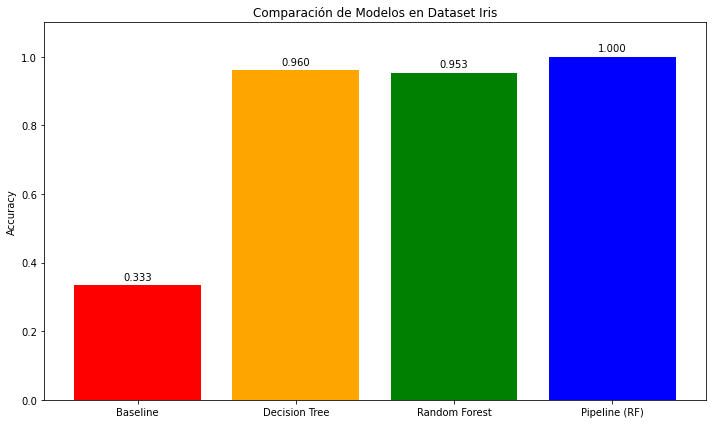

In [28]:
  import matplotlib.pyplot as plt

  # Preparar datos para visualización
  model_names = ['Baseline', 'Decision Tree', 'Random Forest', 'Pipeline (RF)']

  # Obtener accuracies correctamente desde los DataFrames
  baseline_acc = result.aggregate()[result.aggregate()['measure'] == 'classif.acc']['mean'].values[0]
  dt_acc = dt_result.aggregate()[dt_result.aggregate()['measure'] == 'classif.acc']['mean'].values[0]
  rf_acc = rf_result.aggregate()[rf_result.aggregate()['measure'] == 'classif.acc']['mean'].values[0]
  pipe_acc = pipeline_result.aggregate()[pipeline_result.aggregate()['measure'] == 'classif.acc']['mean'].values[0]

  accuracies = [baseline_acc, dt_acc, rf_acc, pipe_acc]

  # Crear gráfico de barras
  plt.figure(figsize=(10, 6))
  bars = plt.bar(model_names, accuracies, color=['red', 'orange', 'green', 'blue'])
  plt.ylabel('Accuracy')
  plt.title('Comparación de Modelos en Dataset Iris')
  plt.ylim(0, 1.1)

  # Añadir valores en las barras
  for bar, acc in zip(bars, accuracies):
      plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
               f'{acc:.3f}', ha='center', va='bottom')

  plt.tight_layout()
  plt.show()

## 12. Próximos Pasos

¡Felicidades! Has aprendido los conceptos básicos de MLPY:

1. ✅ Crear tareas (Tasks)
2. ✅ Usar learners nativos y de scikit-learn
3. ✅ Evaluar modelos con measures
4. ✅ Usar cross-validation
5. ✅ Comparar modelos con benchmark
6. ✅ Crear pipelines

### Para explorar más:

- **AutoML**: Optimización automática de hiperparámetros
- **Paralelización**: Acelerar cálculos con múltiples cores
- **Callbacks**: Monitorear el progreso de experimentos
- **Visualización**: Más tipos de gráficos para análisis

Consulta los otros notebooks para ejemplos más avanzados.